#MatPlotlib 사용해보기

In [ ]:
#!pip3 install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.2.2


np.random.randint 균일분포 난수 1개 생성  
np.random.rand 0~1 사이 균일분포 난수 어레이 생성  
np.random.randn 표준 정규분포 난수 어레이 생성


<Figure size 432x288 with 0 Axes>

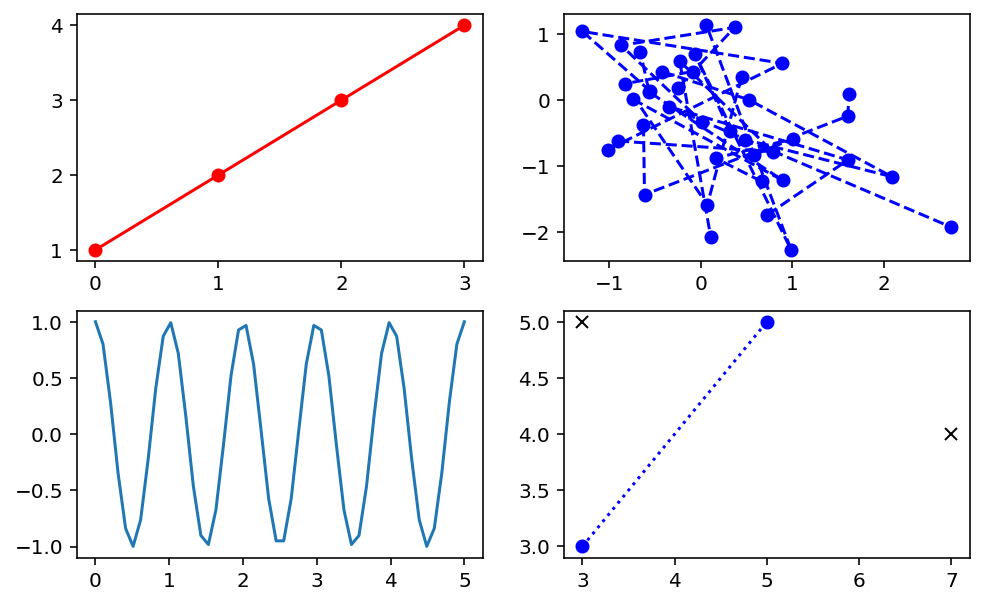

In [ ]:
fig = plt.figure()
fig.suptitle('figure sample plots')

fig, ax_lst = plt.subplots(2, 2, figsize=(8,5))

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()


가로 막대형 시각화

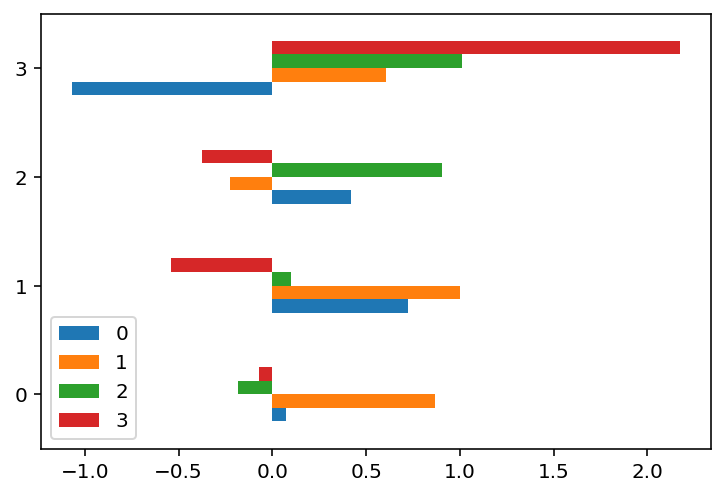

In [ ]:
df = pd.DataFrame(np.random.randn(4,4))
df.plot(kind='barh')

#seaborn 활용 시각화  
•	seaborn은 matplotlib을 기반으로 다양한 색 테마, 차트 기능을 추가한 라이브러리임  
•	matplotlib에 의존성을 가지고 있음  
•	matplotlib에 없는 그래프(히트맵, 카운트플랏 등)을 가지고 있음


In [ ]:
#!pip3 install seaborn

In [ ]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()


Seaborn version :  0.11.2


seaborn에서는 sns.color_palette()를 사용해 팔레트를 설정할 수 있다.  
RGB, hex 코드, HTML 등을 활용해 직접 팔레트를 구성하는 것도 가능하다

#relplot(릴플랏)  


산점도, 선그래프 모두 가능

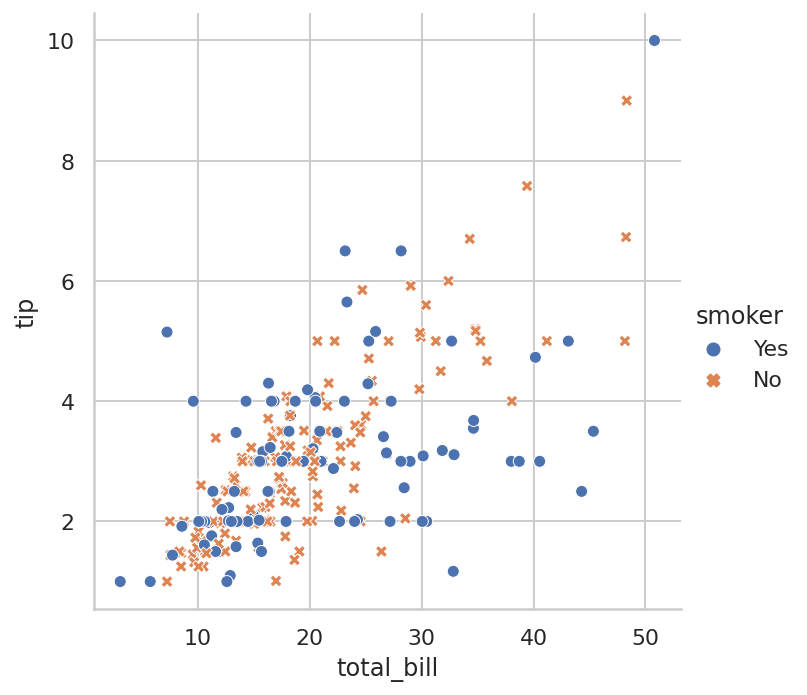

In [ ]:
#산점도 그래프
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips)

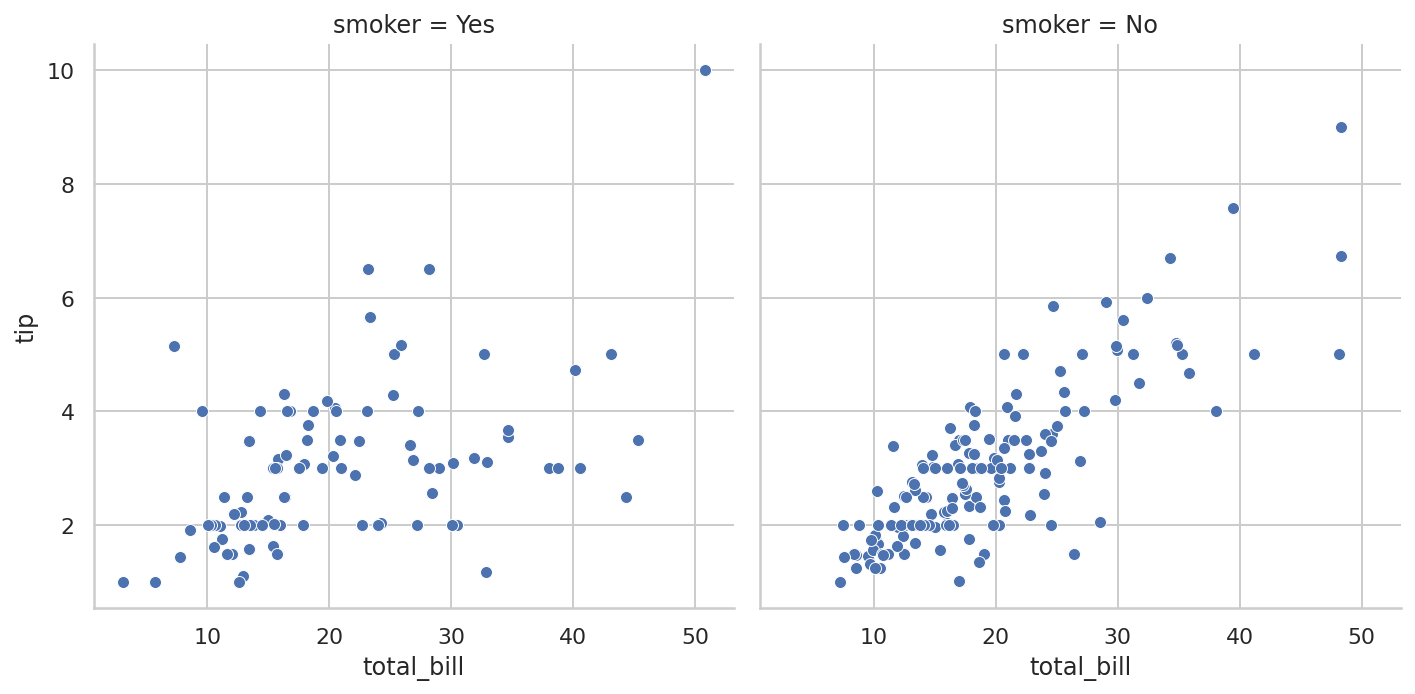

In [ ]:
sns.relplot(x="total_bill", y="tip",  col="smoker",
            data=tips)

seaborn 활용 선그래프로 표현

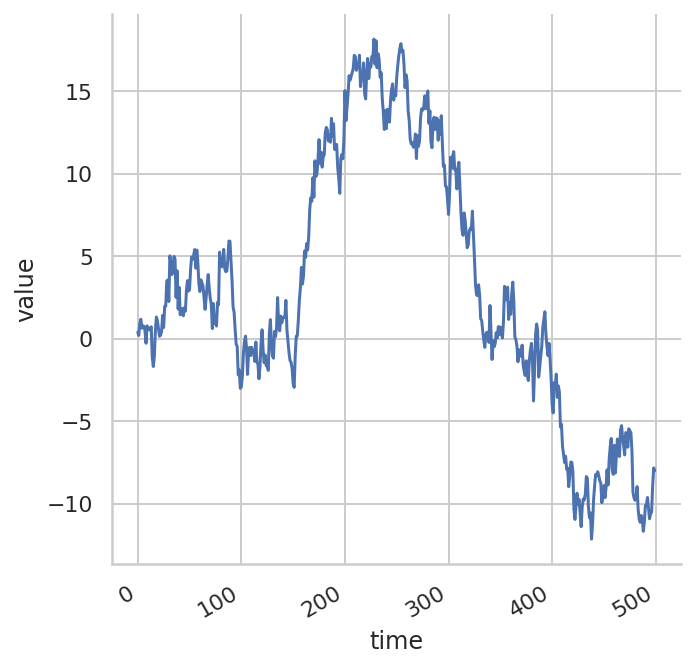

In [ ]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()


#Catplot(캣플랏)  
범주형 변수와 수치형 변수간의 관계 시각화

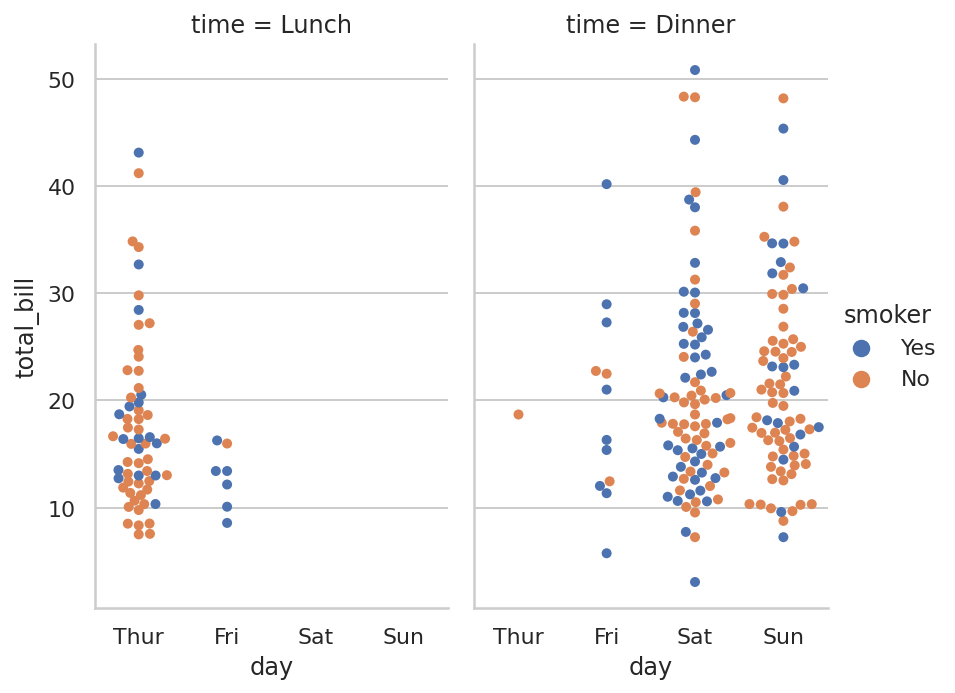

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)


박스플랏 

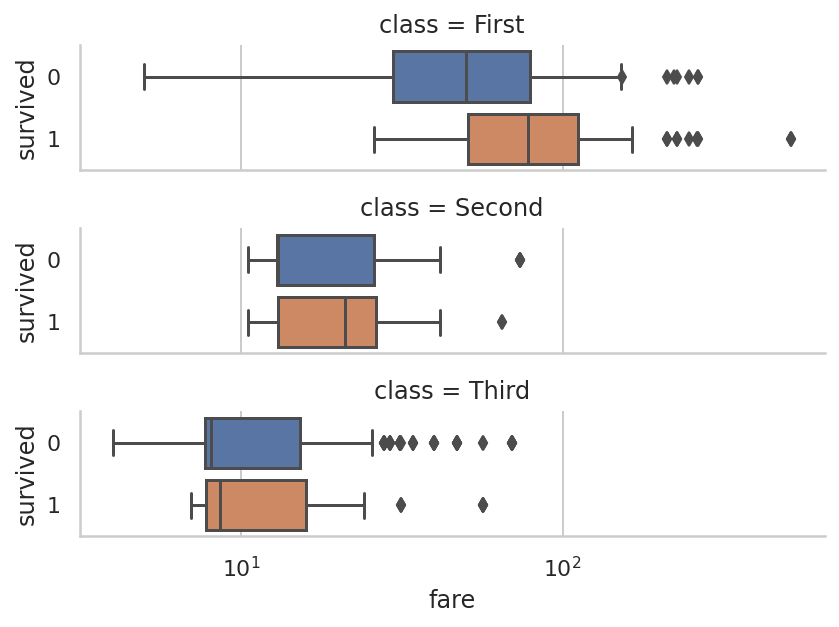

In [ ]:
titanic = sns.load_dataset("titanic")
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");


#parplot(페어플랏)  
여러변수간의 관계 시각화

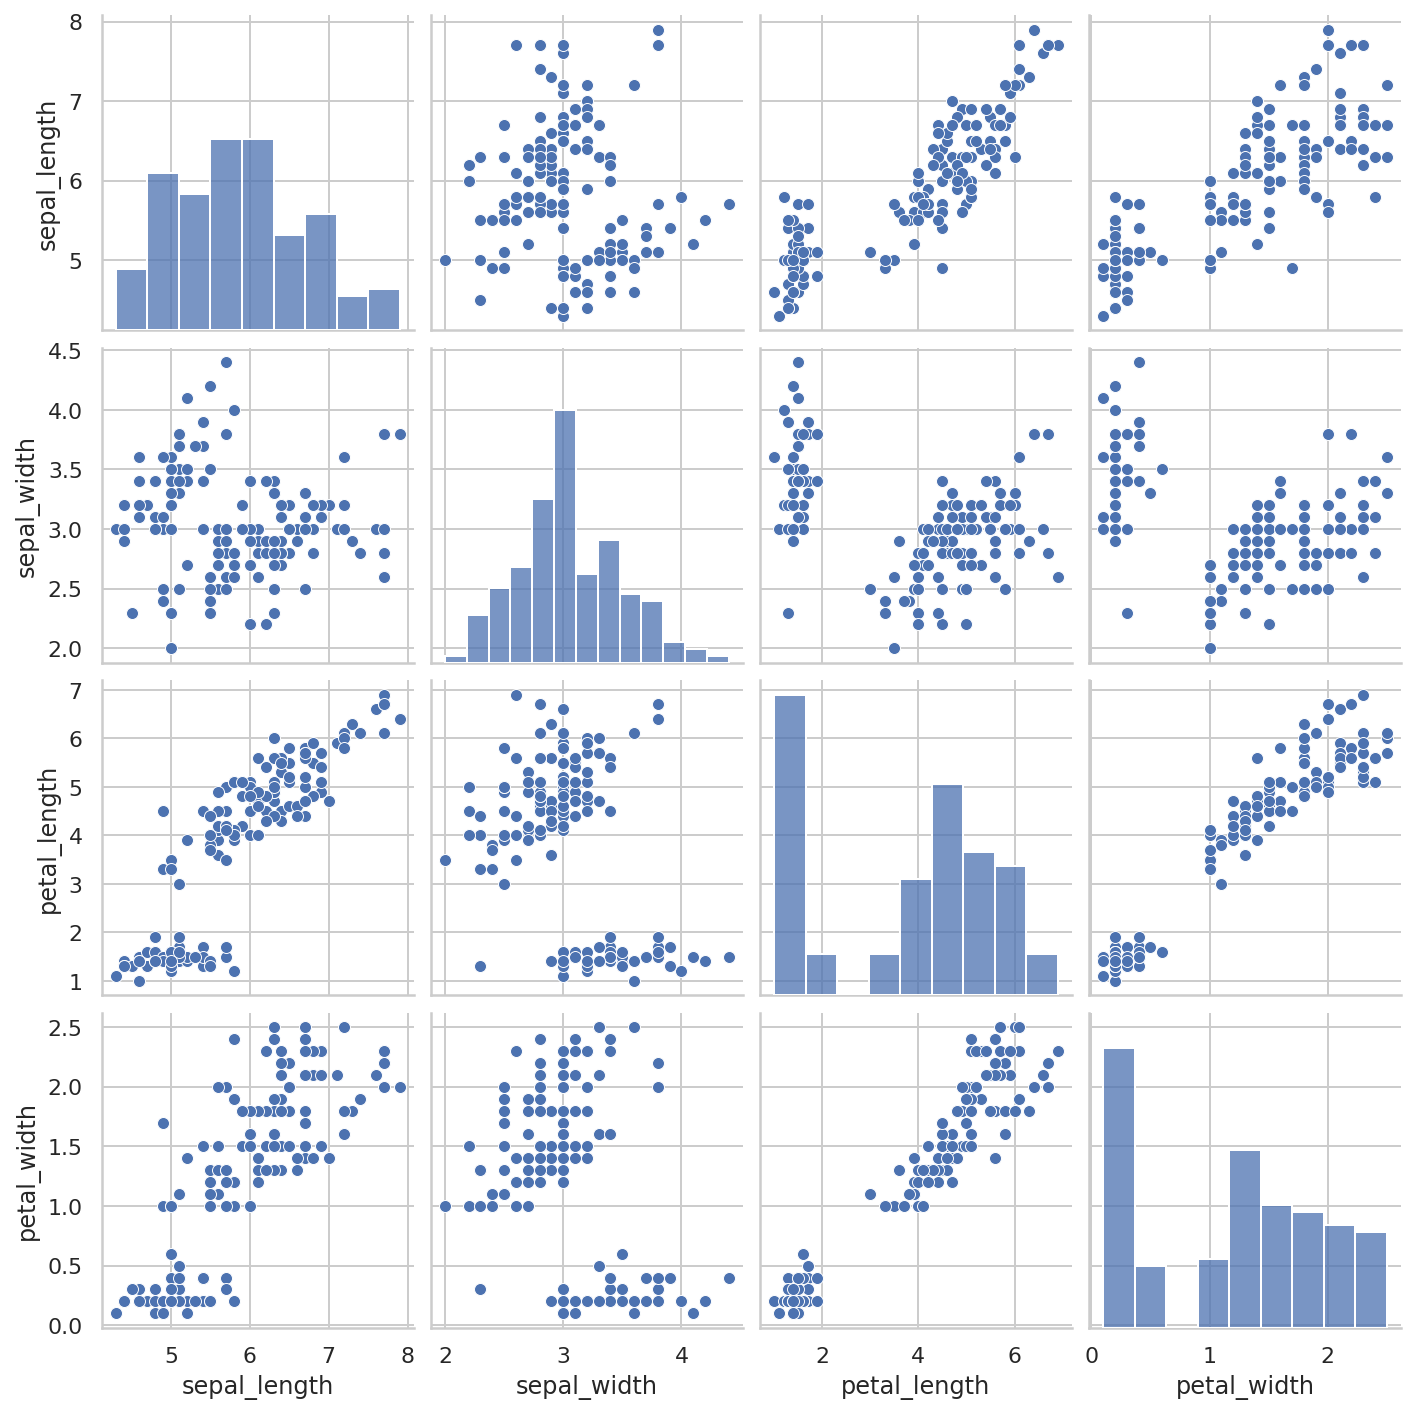

In [ ]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

여러변수간의 관계를 등고선 형태로 표현

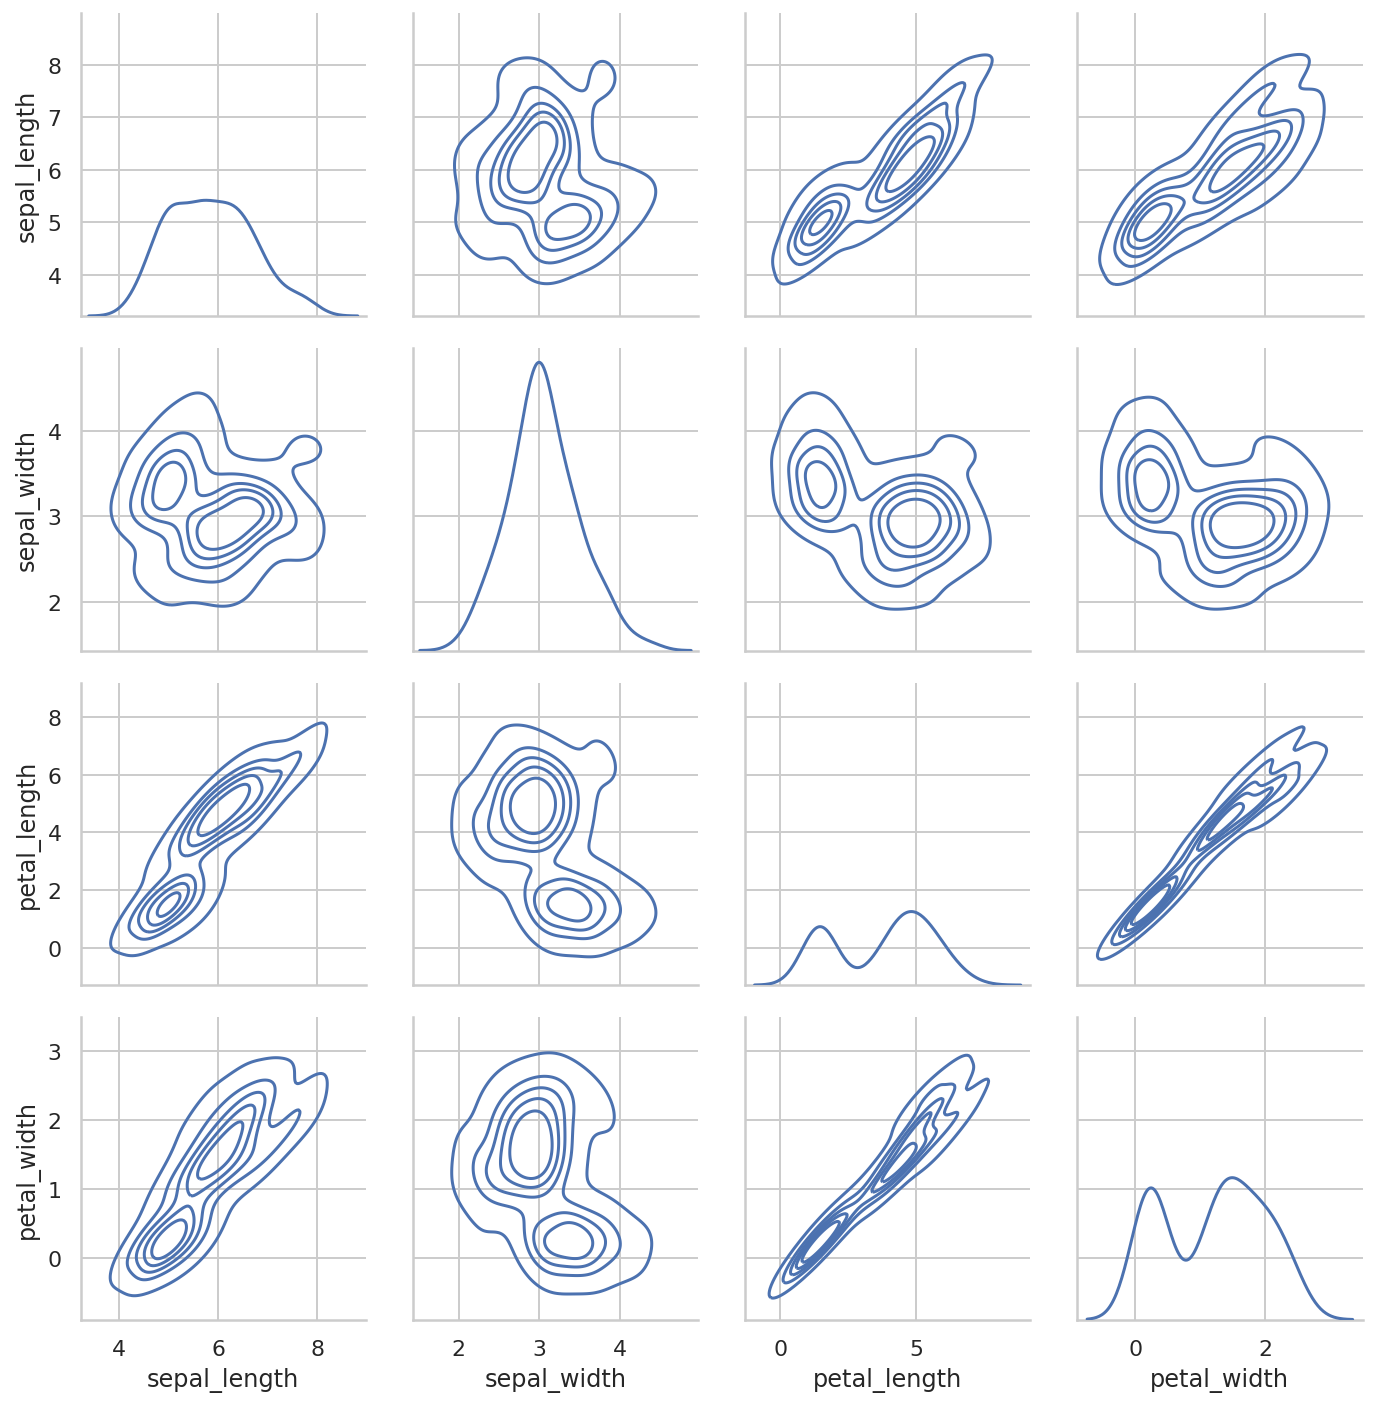

In [ ]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);


#headmap

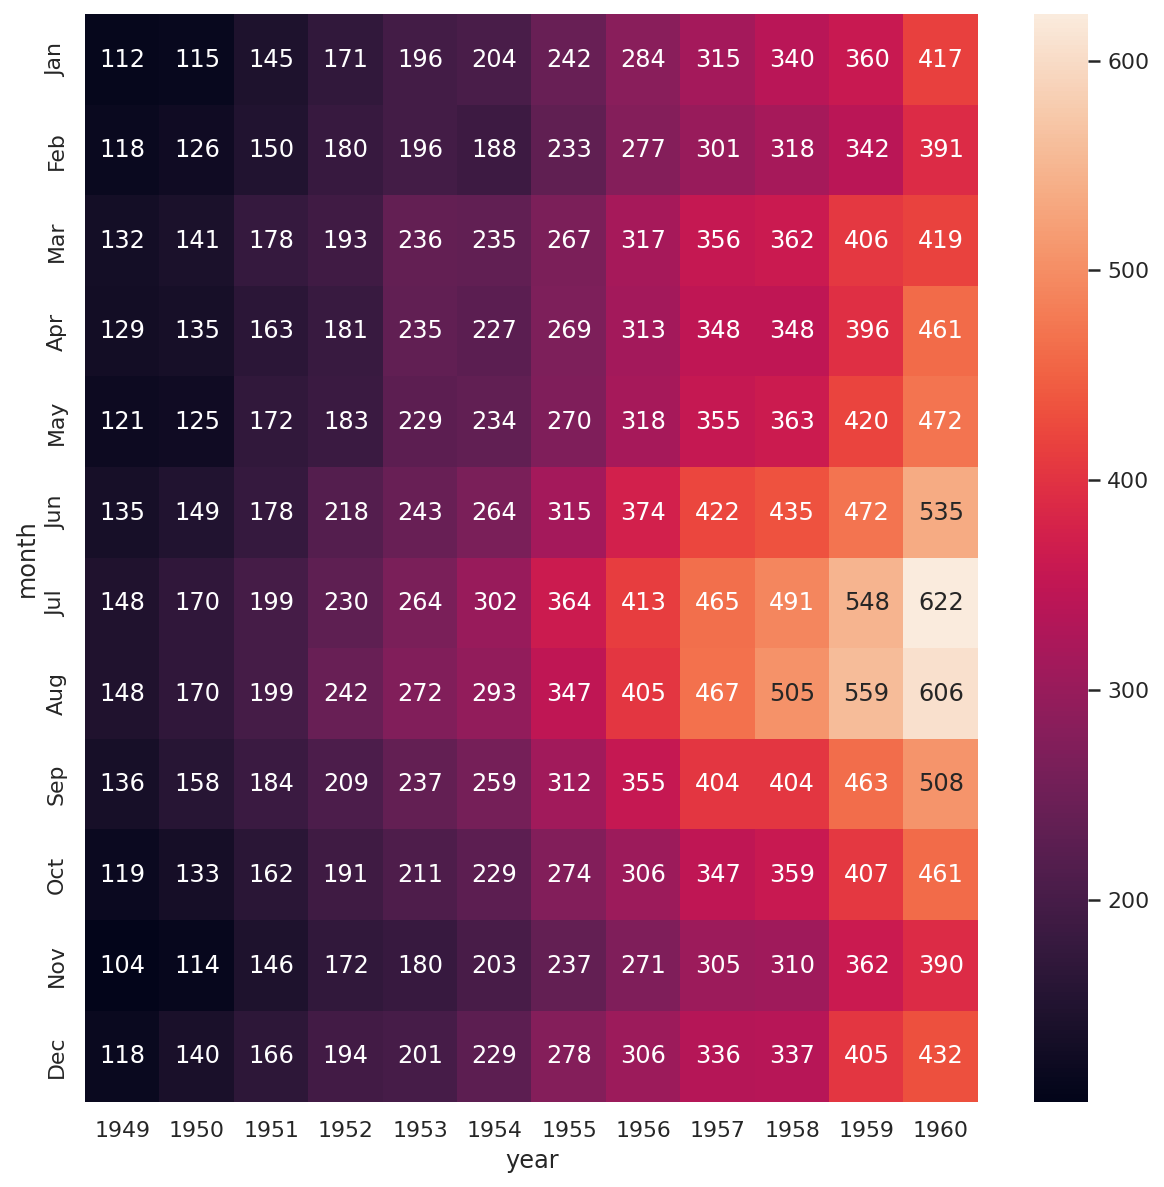

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
plt.figure(figsize=(10, 10))
ax = sns.heatmap(flights, annot=True, fmt="d")


#Python에서 R의 ggplot2 처럼 사용해보기

In [ ]:
!pip3 install plotnine

In [ ]:
import plotnine
from plotnine import *
print("plontnine version :",plotnine.__version__)

plontnine version : 0.8.0


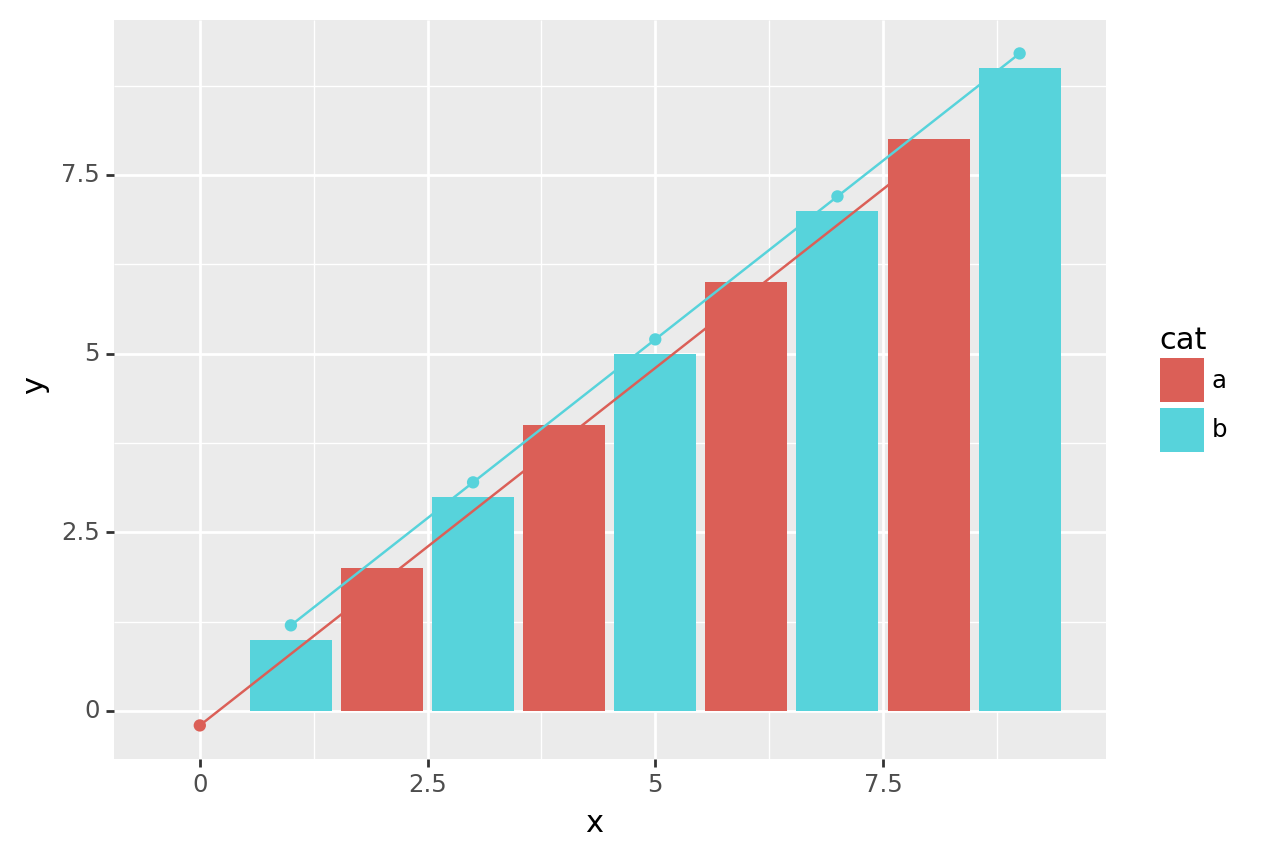

<ggplot: (8726937074825)>

In [ ]:
n = 10
df = pd.DataFrame({'x': np.arange(n),
                   'y': np.arange(n),
                   'yfit': np.arange(n) + np.tile([-.2, .2], n//2),
                   'cat': ['a', 'b']*(n//2)})
(ggplot(df)
 + geom_col(aes('x', 'y', fill='cat'))
 + geom_point(aes('x', y='yfit', color='cat'))
 + geom_path(aes('x', y='yfit', color='cat'))
)


In [ ]:
df2 = pd.DataFrame({
    'letter': ['Alpha', 'Beta', 'Delta', 'Gamma'] * 2,
    'pos': [1, 2, 3, 4] * 2,
    'num_of_letters': [5, 4, 5, 5] * 2
})


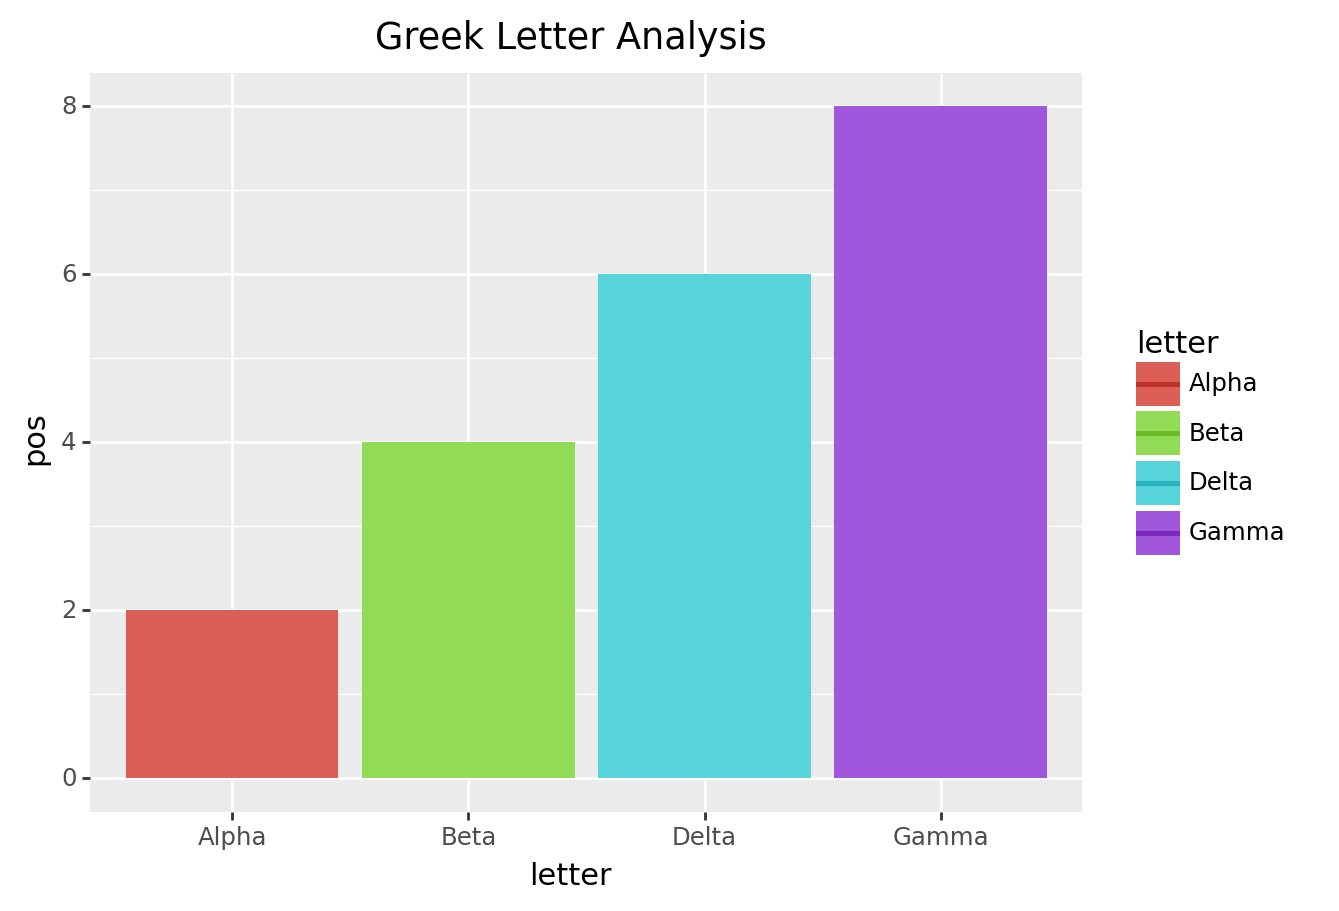

<ggplot: (8726937138849)>

In [ ]:
(ggplot(df2)
 + geom_col(aes(x='letter',y='pos', fill='letter'))
 + geom_line(aes(x='letter', y='num_of_letters', color='letter'), size=1)
 + scale_color_hue(l=0.45)                                  # some contrast to make the lines stick out
 + ggtitle('Greek Letter Analysis')
)


In [ ]:
  !pip3 install folium

#Folium(폴리엄)  
•	folium은 지도 데이터(Open Street Map)에 leaflet.js를 이용한 위치정보 시각화 라이브러리  
•	자바스크립트 기반이라 interactive하게 그래프를 그릴 수 있음  
•	한국 GeoJSON 데이터는 southkorea-maps에서 확인가능


In [ ]:
import folium
print("folium version is", folium.__version__)

folium version is 0.12.1.post1


In [ ]:
m = folium.Map(location=[37.5502, 126.982], zoom_start=12)
m

In [ ]:
folium.Marker(location=[37.5502, 126.982], popup="Marker A",
             icon=folium.Icon(icon='cloud')).add_to(m)
folium.Marker(location=[37.5411, 127.0107], popup="한남동",
             icon=folium.Icon(color='red')).add_to(m)
m
